In [2]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Using TensorFlow backend.


In [3]:
import os

In [4]:
df = pd.read_csv("train.csv")

In [5]:
for index, row in df.iterrows():
    image = row[0]
    w = row[1]
    x = row[2]
    y = row[3]
    z = row[4]
    print(row)
    break

image     0101_003.png
w                  770
x                  946
y                 2070
z                 2973
result           table
Name: 0, dtype: object


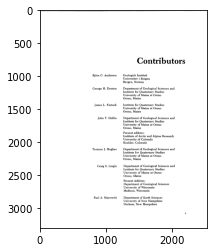

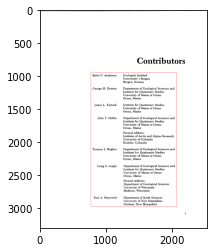

In [6]:
image = cv2.imread("images/0101_003.png")
plt.imshow(image)
cv2.rectangle(image,(w,x),(y,z),(255,0,0), 2)
plt.figure()
plt.imshow(image)

In [7]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

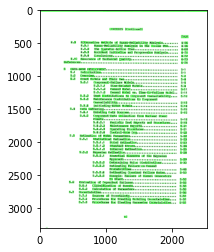

In [7]:
img = cv2.imread("images/0113_013.png")

ss.setBaseImage(img)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = img.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [8]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [9]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [10]:
train_images=[]
train_labels=[]

In [11]:
#preprocessing
for index, row in df.iterrows():
  try:
      image_name = "images/"+row[0]
      w = row[1]
      x = row[2]
      y = row[3]
      z = row[4]
      # print(row)
      image = cv2.imread(image_name)
      # plt.imshow(image)
      gtvalues = []
      gtvalues.append({"x1":w, "x2":x, "y1":y, "y2":z})
      ss.setBaseImage(image)
      ss.switchToSelectiveSearchFast()
      ssresults = ss.process()
      imout = image.copy()
      counter = 0
      falsecounter = 0
      flag = 0
      fflag = 0
      bflag = 0
      for e, result in enumerate(ssresults):
        if e < 2000 and flag == 0:
          for gtval in gtvalues:
            x,y,w,h = result
            iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
            if counter < 30:
              if iou > 0.70:
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                train_images.append(resized)
                train_labels.append(1)
                counter += 1
              else :
                fflag =1
              if falsecounter <30:
                if iou < 0.3:
                  timage = imout[y:y+h,x:x+w]
                  resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                  train_images.append(resized)
                  train_labels.append(0)
                  falsecounter += 1
              else :
                bflag = 1
          if fflag == 1 and bflag == 1:
            print("inside")
            flag = 1
  except Exception as e:
    print(e)
    print("error in image/"+row[0])
    continue

inside
inside
inside
inside

error in image/0146_281.png
inside

error in image/0147_090.png
inside

error in image/0147_125.png

error in image/0147_125.png

error in image/0147_256.png
inside

error in image/0148_271.png

error in image/0148_479.png

error in image/0151_180.png

error in image/0151_208.png

error in image/0154_080.png

error in image/0154_474.png

error in image/0155_081.png
inside

error in image/0203_075.png
inside

error in image/0206_048.png
inside
inside

error in image/0210_111.png

error in image/0212_175.png

error in image/0219_043.png
inside

error in image/0223_017.png
inside
inside

error in image/0651_008.png

error in image/0651_013.png
inside

error in image/0667_005.png

error in image/0667_005.png

error in image/0672_278.png

error in image/0672_356.png

error in image/0685_048.png

error in image/0717_023.png
inside
inside

error in image/0765_005.png
inside

error in image/1040_032.png

error in image/1060_146.png
inside

error in image/1060_223.p

KeyboardInterrupt: 

In [16]:
np.save(, train_images[0])

In [18]:
#saving the perprocessed images and labels
i=0
for index,row in df.iterrows():
    try:
        image_name = row[0]
        np.save("preprocessed/"+image_name, train_images[i])
        i+=1
    except Exception as e:
        print(e)

In [29]:
#saving the labels
i=0
data = ""
for index,row in df.iterrows():
    try:
        image_name = row[0]
        if(i>0):
            data = data + ","
        data = data + str(image_name)+" : "+str(train_labels[i])
        i+=1
    except Exception as e:
        print(e)
with open('labels.txt', 'w') as f:
    f.write(data)

In [30]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [31]:
X_new.shape

(1050, 224, 224, 3)

In [32]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [33]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________

In [34]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [35]:
X= vggmodel.layers[-2].output

In [36]:
predictions = Dense(2, activation="softmax")(X)

In [37]:
model_final = Model(input = vggmodel.input, output = predictions)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [38]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

In [39]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [40]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [42]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [43]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [44]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [45]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(945, 224, 224, 3) (105, 224, 224, 3) (945, 2) (105, 2)


In [46]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [47]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [48]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [50]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 10, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

Epoch 1/10
10/10 [==============================] - 259s 26s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00001: val_loss did not improve from 0.00000
Epoch 2/10
10/10 [==============================] - 212s 21s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00002: val_loss did not improve from 0.00000
Epoch 3/10
10/10 [==============================] - 224s 22s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00003: val_loss did not improve from 0.00000
Epoch 4/10
10/10 [==============================] - 211s 21s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00004: val_loss did not improve from 0.00000
Epoch 5/10
10/10 [==============================] - 227s 23s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 00005: val_loss did not improve fro

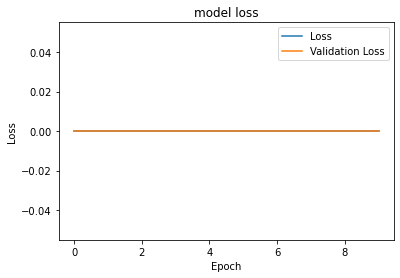

<Figure size 432x288 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart_loss.png')

not a table


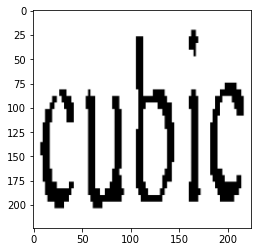

In [62]:
im = X_test[70]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("Table")
else:
    print("not a table")

In [68]:
model_final.save('my_model.h5')

In [69]:
model_loaded = tf.keras.models.load_model('my_model.h5')

In [ ]:
# img = cv2.imread("images/9571_020.png")
# ss.setBaseImage(img)
# ss.switchToSelectiveSearchFast()
# ssresults = ss.process()
# imout = img.copy()
# for e,result in enumerate(ssresults):
#     if e < 2000:
#         x,y,w,h = result
#         timage = imout[y:y+h,x:x+w]
#         resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
#         img = np.expand_dims(resized, axis=0)
#         out= model_loaded.predict(img)
#         if out[0][0] > 0.65:
#             cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
#     plt.figure()
#     plt.imshow(imout)